# Machine Learning Assignment

**Dataset**:       NASA NEO


## Imports

Add imports here as needed.

Remember to **re-run the cell when you add imports**, so it gets loaded into the virtual notebook environment!

In [2]:
# Data and Datasets
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler

# Clustering
from sklearn.cluster import DBSCAN

# Validation methods
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import StratifiedKFold

# Metrics
from sklearn import metrics
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

# Classifiers
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import KNeighborsClassifier

# Hyper-parameter optimisation
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# Feature selection & feature engineering
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
from sklearn.decomposition import PCA

# Stats
from scipy.stats import randint as sp_randint
from scipy.stats import pearsonr
from scipy.stats import spearmanr
from scipy.stats import shapiro     # Shapiro Wilk
from scipy.stats import normaltest  # D’Agostino’s K^2
from scipy.stats import anderson    # Anderson-Darling
from scipy.stats import ttest_ind    # independent student t-test; assumes normality
from scipy.stats import mannwhitneyu # non-parametric; doesn't assume normality

# Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import SVG
from graphviz import Source
from IPython.display import display
from sklearn.tree import export_graphviz

# Utils
import pprint
import numpy as np
from time import time
import openpyxl

## Loading the dataset

In [9]:
import pandas as pd



df = pd.read_csv('/content/nasa_nearest_earth_objects_dataset.csv')
df.dropna(subset=['relative_velocity','min_diameter','max_diameter','name','miss_distance','abs_magnitude'], inplace=True)

# printing out dataset info
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 58141 entries, 2 to 131415
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               58141 non-null  object 
 1   abs_magnitude      58141 non-null  float64
 2   min_diameter       58141 non-null  float64
 3   max_diameter       58141 non-null  float64
 4   orbiting_body      46385 non-null  object 
 5   relative_velocity  58141 non-null  float64
 6   miss_distance      58141 non-null  float64
 7   is_hazardous       58141 non-null  int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 4.0+ MB
None


,name,abs_magnitude,min_diameter,max_diameter,orbiting_body,relative_velocity,miss_distance,is_hazardous
2,(2014 BT8),25.00,0.026580,0.059435,NaN,47477.649832,4.290521e+07,0
3,(2008 OX1),21.50,0.133216,0.297879,Earth,57853.295346,2.727908e+07,1
5,(2022 CM3),26.02,0.016617,0.037157,Earth,45125.612049,3.422388e+07,0
8,284422 (2006 YD),17.36,0.896510,2.004657,Earth,99804.739017,5.519530e+07,0
10,(2021 CZ2),22.45,0.086011,0.192327,Earth,100358.594754,6.804645e+07,0


In [10]:
df.describe()

,abs_magnitude,min_diameter,max_diameter,relative_velocity,miss_distance,is_hazardous
count,58141.000000,58141.000000,58141.000000,58141.000000,5.814100e+04,58141.000000
mean,22.337355,0.189063,0.402012,54064.122477,4.142794e+07,0.329509
std,2.853110,0.323577,0.715958,27312.611303,2.076415e+07,0.470039
min,10.410000,0.000683,0.000000,1112.195850,1.291314e+04,0.000000
25%,20.320000,0.034878,0.062236,33320.755229,2.466151e+07,0.000000
50%,21.780000,0.117099,0.246627,50475.346307,4.311428e+07,0.000000
75%,24.410000,0.229380,0.489824,69951.728226,5.926722e+07,1.000000
max,32.950000,22.006703,49.208483,275303.183496,7.479273e+07,1.000000


## Exploratory data analysis

Section for exploratory data analysis, to address **Tasks 1.1 and 1.2**.

**OBS:** You may need to do some data cleaning before you do your full exploratory data analysis, though you will find that some functions we'll cover in this unit are able to handle things like missing values and non-numeric data.

**Create more cells as needed!**

<Axes: ylabel='abs_magnitude'>

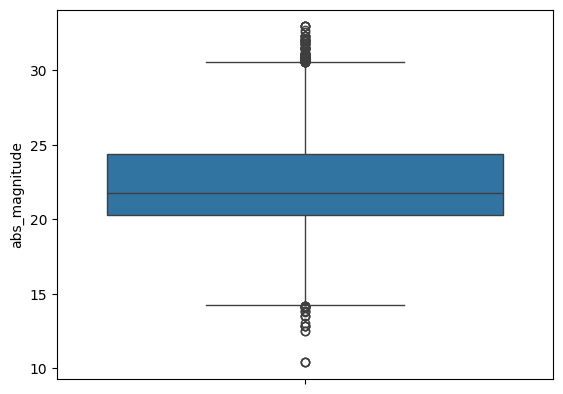

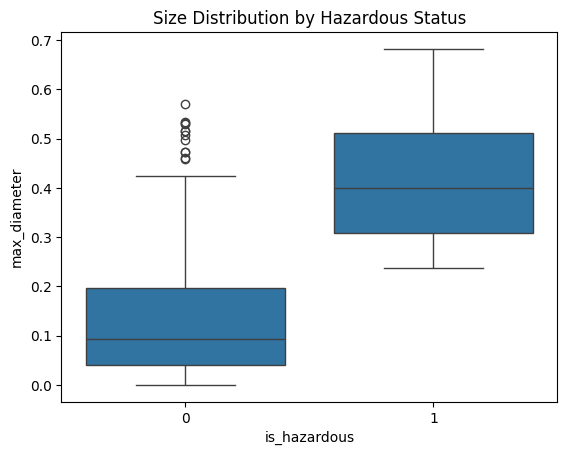

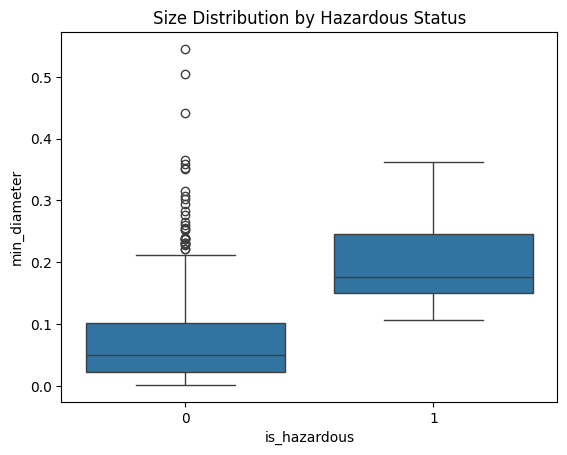

## Task 2.1 - ML Workflow to Critically Evaluate

In [ ]:
# Dropping all rows with missing values
df = df.dropna()

# Converting all non-numeric (object) features to numeric
cat_columns = df.select_dtypes(['object']).columns
df[cat_columns] = df[cat_columns].apply(lambda x: x.astype('category')) # converting 'object' columns to 'category' type
df[cat_columns] = df[cat_columns].apply(lambda x: x.cat.codes) # converting the 'category' columns to integer encoded values

In [ ]:
# Splits the Pandas DataFrame into a feature matrix (X) and class/label vector (y)
X = df.iloc[:,:len(df.columns)-1]
y = df.iloc[:,len(df.columns)-1]

# Splitting dataset for hold-out validation
X_train, X_test, y_train, y_test = train_test_split(X, # feature matrix
                                                    y, # label vector
                                                    test_size=0.2,
                                                    random_state=1,
                                                    stratify=None
                                                   )

# Creating and testing a Logistic Regression Model
model = RandomForestClassifier()

# Training the model
model.fit(X_train, y_train)

# Testing the model
y_pred = model.predict(X_test)

# Printing out confusion matrix and accuracy
print(metrics.confusion_matrix(y_test, y_pred))
print("\nAccuracy (Testing):  %0.2f " % (metrics.accuracy_score(y_test, y_pred)))

[[5625  561]
 [ 310 2781]]

Accuracy (Testing):  0.91 


## Task 2.3 - Evaluation of Improved ML Workflow

Add code for running your **improved** machine learning experiments below.


In [ ]:
# Loading the dataset again, for you to do your own pre-processing (instead of what was done above)
df = pd.read_csv('data/nasa_nearest_earth_objects_dataset.csv')